In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

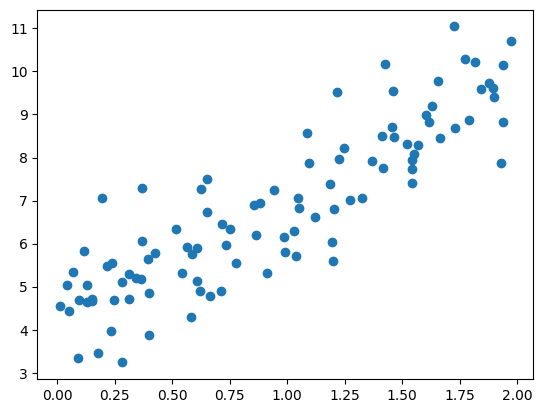

In [2]:
np.random.seed(42)
m = 100
X = 2* np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

Compute 0 using normal equation.

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

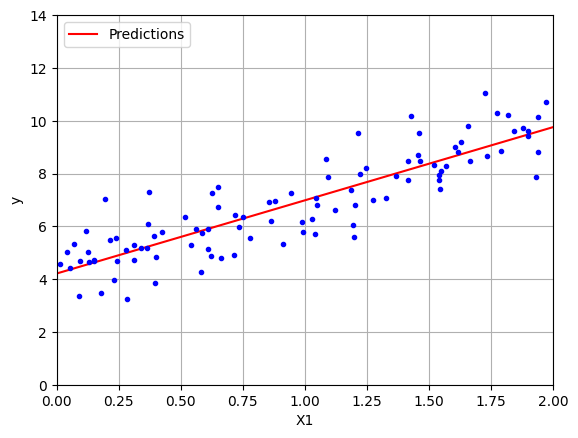

In [5]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")
plt.xlim(0, 2)
plt.ylim(0, 14)
plt.legend(loc='upper left')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rans, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

Gradient descent step

In [10]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.rand(2, 1) # randomly initialized model parameters
for epoch in range(n_epochs):
  gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

# Stochastic Gradient Descent

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D target
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial Regression



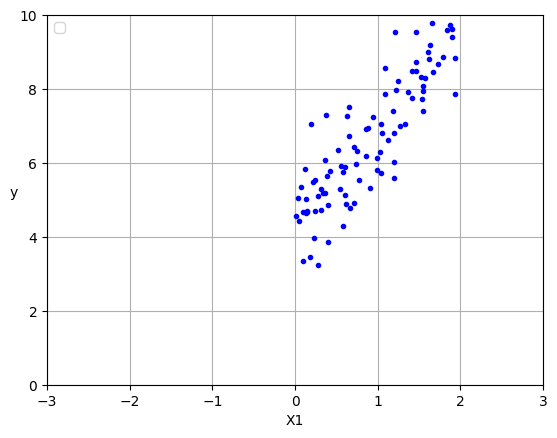

In [15]:
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y", rotation=0)
plt.xlim(-3, 3)
plt.ylim(0, 10)
plt.legend(loc='upper left')
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.74908024])

In [17]:
X_poly[0]

array([0.74908024, 0.5611212 ])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.56140272]), array([[1.63887939, 0.5810637 ]]))

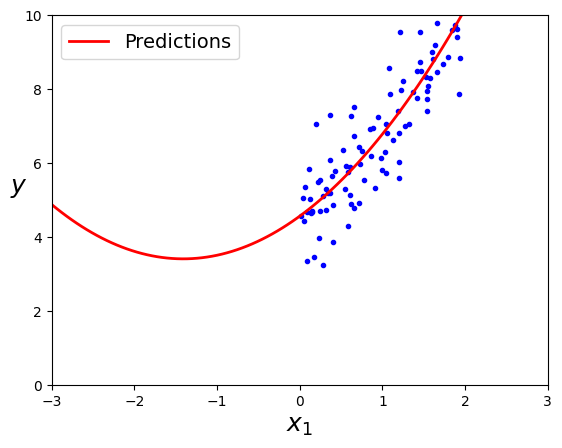

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

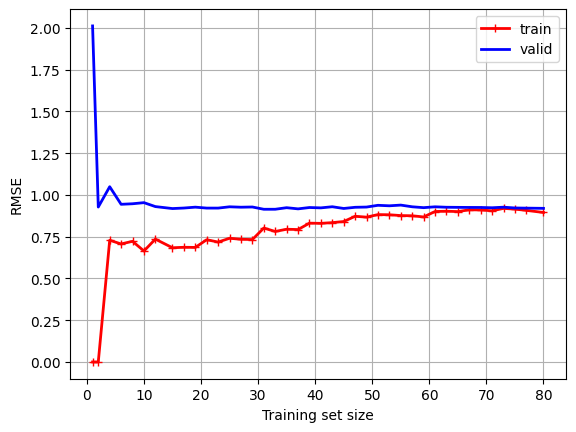

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.legend()
plt.grid()
plt.ylabel("RMSE")
plt.xlabel("Training set size")
plt.show()

b

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.36585531]])

In [22]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.36750446])

In [24]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

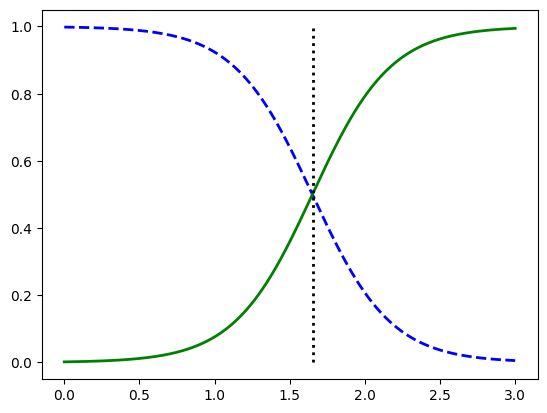

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
[...] # beautify the figure: add grid, labels, axis, legend, arrows, and samples
plt.show()